In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output

In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [3]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


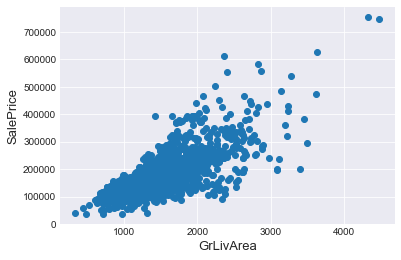

In [4]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 12.02 and sigma = 0.40



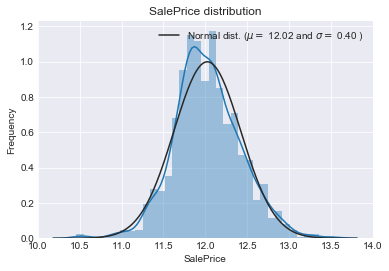

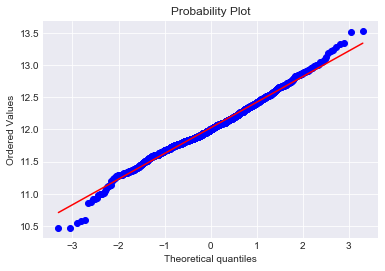

In [5]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [6]:
#Deleting outliers
train = train.drop(train[(train['Alley']=="Pave") & (train['SalePrice']<11.0)].index)
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2916, 79)


In [7]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.399
Alley,93.244
Fence,80.453
FireplaceQu,48.663
LotFrontage,16.667
GarageQual,5.453
GarageCond,5.453
GarageFinish,5.453
GarageYrBlt,5.453


In [8]:
all_data.drop("PoolQC",axis=1,inplace=True)

In [9]:
all_data.drop("MiscFeature",axis=1,inplace=True)
all_data.shape

(2916, 77)

In [10]:
all_data["Alley"] = all_data["Alley"].fillna("None")
#Deleting outliers
train = train.drop(train[(train['Alley']=="Pave") & (train['SalePrice']<11.0)].index)

In [11]:
all_data.drop("Fence",axis=1,inplace=True)
all_data.shape

(2916, 76)

In [12]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [13]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [14]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [15]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].median())
for col in ( 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [16]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF'):
    all_data[col] = all_data[col].fillna(all_data[col].mean())
all_data.drop("BsmtFullBath",axis=1,inplace=True)
all_data.drop("BsmtHalfBath",axis=1,inplace=True)
all_data.shape

(2916, 74)

In [17]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [18]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [19]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [20]:
all_data = all_data.drop(['Utilities'], axis=1)

In [21]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [22]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [23]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [24]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [25]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [26]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna(all_data['MSSubClass'].mode()[0])

In [27]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [28]:
#MSSubClass=The building class,change int to str
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC','KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional',  'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2916, 73)


In [30]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [31]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.936
PoolArea,17.686
LotArea,13.107
LowQualFinSF,12.082
3SsnPorch,11.370
LandSlope,4.972
KitchenAbvGr,4.300
BsmtFinSF2,4.144
EnclosedPorch,4.011
ScreenPorch,3.944


In [32]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 55 skewed numerical features to Box Cox transform


In [33]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2916, 211)


In [34]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [35]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [36]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

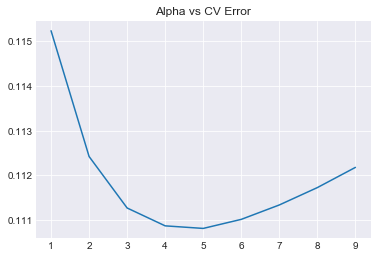

In [86]:
alphas = range(1,10)
test_scores = []
for alpha in alphas:
    clf = make_pipeline(RobustScaler(), Lasso(alpha=alpha*0.0001, random_state=1)) 
    test_score = np.sqrt(-cross_val_score(clf,train.values, y_train, scoring='neg_mean_squared_error',cv=5))
    test_scores.append(np.mean(test_score))
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

In [37]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1)) 

10


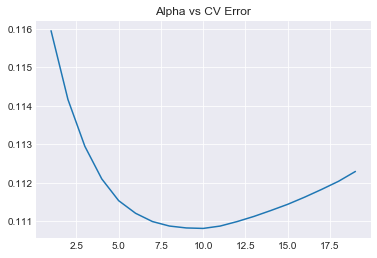

In [94]:
alphas = range(1,10)
alphas2 = range(1,20)
test_scores = []
for alpha in alphas2:
    clf = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=alpha*0.1, random_state=3))
    test_score = np.sqrt(-cross_val_score(clf,train.values, y_train, scoring='neg_mean_squared_error',cv=5))
    test_scores.append(np.mean(test_score))
plt.plot(alphas2, test_scores)
plt.title("Alpha vs CV Error");
print(alphas2[test_scores.index(min(test_scores))])

In [38]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=1, random_state=3))

4


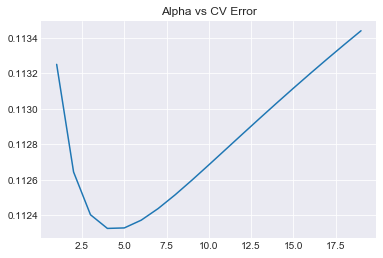

In [101]:
alphas = range(1,20)
# alphas2 = range(1,20)
test_scores = []
for alpha in alphas:
    clf = KernelRidge(alpha=1.2, kernel='polynomial', degree=2, coef0=alpha)
    test_score = np.sqrt(-cross_val_score(clf,train.values, y_train, scoring='neg_mean_squared_error',cv=5))
    test_scores.append(np.mean(test_score))
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");
print(alphas2[test_scores.index(min(test_scores))])

In [106]:
KRR = KernelRidge(alpha=1.2, kernel='polynomial', degree=2, coef0=4)

1


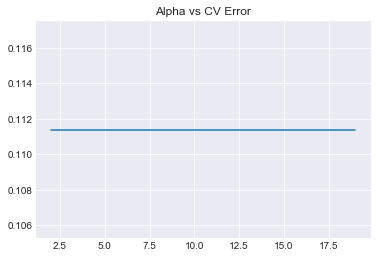

In [114]:
alphas = range(2,20)
# alphas2 = range(1,20)
test_scores = []
for alpha in alphas:
    clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=6, min_samples_split=17, 
                                   loss='huber', random_state =5)
    test_score = np.sqrt(-cross_val_score(clf,train.values, y_train, scoring='neg_mean_squared_error',cv=5))
    test_scores.append(np.mean(test_score))
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");
print(alphas2[test_scores.index(min(test_scores))])

In [115]:
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=6, min_samples_split=17, 
                                   loss='huber', random_state =5)

52


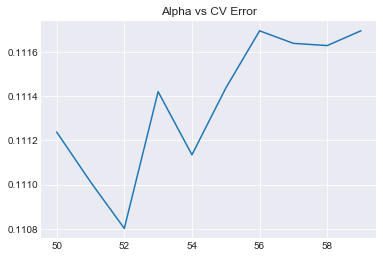

In [138]:
alphas = range(50,60)
# alphas2 = range(1,20)
test_scores = []
for alpha in alphas:
    clf = xgb.XGBRegressor(colsample_bytree=0.13, gamma=0.02, 
                             learning_rate=0.05, max_depth=2, 
                             min_child_weight=1.7, n_estimators=2500,
                             reg_alpha=0.33, reg_lambda=1,
                             subsample=0.5212, silent=1,
                             random_state =7, nthread = -1)
    test_score = np.sqrt(-cross_val_score(clf,train.values, y_train, scoring='neg_mean_squared_error',cv=5))
    test_scores.append(np.mean(test_score))
plt.plot(alphas, test_scores) 
plt.title("Alpha vs CV Error");
print(alphas[test_scores.index(min(test_scores))])

In [140]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.13, gamma=0.02, 
                             learning_rate=0.05, max_depth=2, 
                             min_child_weight=1.7, n_estimators=2500,
                             reg_alpha=0.33, reg_lambda=1,
                             subsample=0.5212, silent=1,
                             random_state =7, nthread = -1)

23


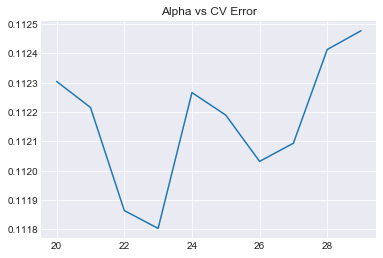

In [155]:
alphas = range(20,30)
# alphas2 = range(1,20)
test_scores = []
for alpha in alphas:
    clf = lgb.LGBMRegressor(objective='regression',num_leaves=4,
                              learning_rate=0.04, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    test_score = np.sqrt(-cross_val_score(clf,train.values, y_train, scoring='neg_mean_squared_error',cv=5))
    test_scores.append(np.mean(test_score))
plt.plot(alphas, test_scores) 
plt.title("Alpha vs CV Error");
print(alphas[test_scores.index(min(test_scores))])

In [163]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [157]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1108 (0.0090)



In [158]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1108 (0.0090)



In [159]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1123 (0.0100)



In [160]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1114 (0.0112)



In [161]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1112 (0.0078)



In [164]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1133 (0.0085)



In [165]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [166]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1073 (0.0099)



In [167]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [168]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1065 (0.0094)


In [169]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [170]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.08213743907789517


In [171]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07544497914534244


In [172]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07109448561859245


In [178]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.9 +
               xgb_train_pred*0.1 + lgb_train_pred*0 ))

RMSLE score on train data:
0.08089194927573765


In [205]:
ensemble = stacked_pred*0.65+ xgb_pred*0.05 + lgb_pred*0.3

In [206]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)